In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## PUNTO 1

In [37]:
file="https://www.ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
data=pd.read_csv(file,delim_whitespace=True,skiprows=1)

In [304]:
f=(data['Year']== 2012) & (data['Month']== 1) & (data['Day'] == 1)
indice=int(data.index[f][0])
indice+=1

In [305]:
data=data.iloc[:indice]

## PUNTO 1.1

In [40]:
datos=data['SSN'].to_numpy()
media_datos=np.mean(datos)
datos-=media_datos

In [219]:
Transformada=np.fft.fft(datos)
#Transformada=np.fft.fftshift(Transformada)
norma_transformada=np.abs(Transformada)
frecuencias=np.fft.fftfreq(len(Transformada),1.0)
indice_max=np.argmax(norma_transformada[0:len(norma_transformada)//2])
f_principal=frecuencias[indice_max]
f_principal ##[f_p]=ciclos por dia

0.0002451781627983001

In [307]:
periodo=(1/f_principal)/365.15 #Periodo en años
periodo

11.169838878999498

El periodo del ciclo de actividad solar es 11.17 años

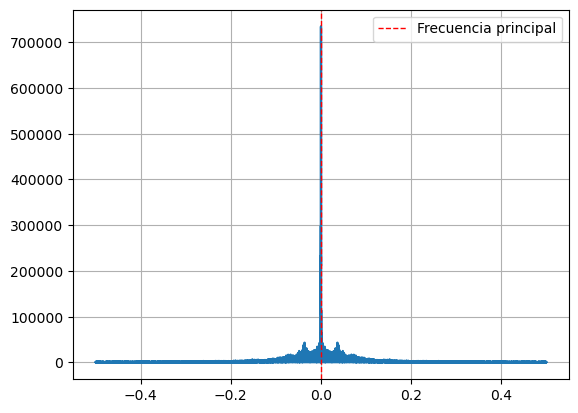

In [308]:
#Transformada fourier
plt.plot(frecuencias,norma_transformada)
#plt.xlim(0.0,1)
plt.axvline(f_p,color="r",linestyle="--",label="Frecuencia principal",lw=1)
plt.grid()
plt.legend()

/var/folders/wc/q8bq4xy97n3_jwd21hpc51y80000gn/T/ipykernel_1718/2456994340.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(frecuencias),np.log10(norma_transformada))
/var/folders/wc/q8bq4xy97n3_jwd21hpc51y80000gn/T/ipykernel_1718/2456994340.py:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(frecuencias),np.log10(norma_transformada))


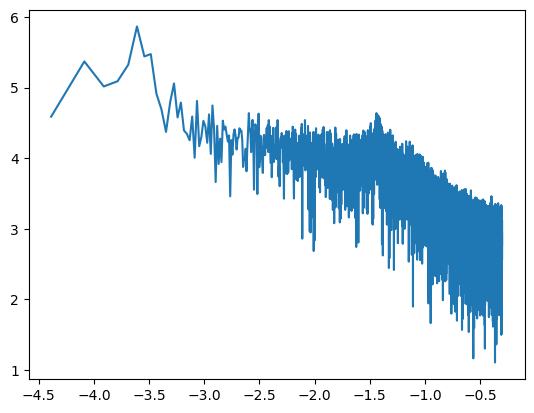

In [76]:
plt.plot(np.log10(frecuencias),np.log10(norma_transformada))

## PUNTO 1.2

In [77]:
def gauss(f,alpha):
    return np.exp(-(f*alpha))

In [113]:
def threshold(frecuencias,f_lim):
    filtro=np.zeros_like(frecuencias)
    for i,f in enumerate(frecuencias):
        if abs(f)<f_lim:
            filtro[i]=1
        else:
            filtro[i]=0
    return filtro

### Punto 1.2.a

0.0002451781627983001


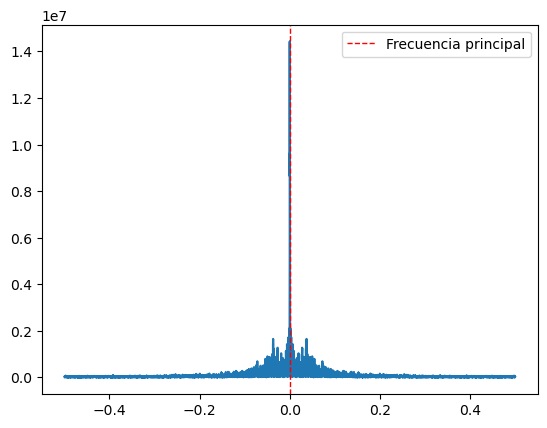

In [123]:
#####tipo Gauss
señal_filtrada=np.fft.fft(datos*gauss(frecuencias,10))
norma_señal_filtrada=abs(señal_filtrada)
indice_max=np.argmax(norma_señal_filtrada[0:len(norma_señal_filtrada)//2])
f_p=frecuencias[indice_max]
plt.plot(frecuencias,norma_señal_filtrada)
plt.axvline(f_p,color="r",linestyle="--",label="Frecuencia principal",lw=1)
print(f_p)
plt.legend()

0.00020431513566525008


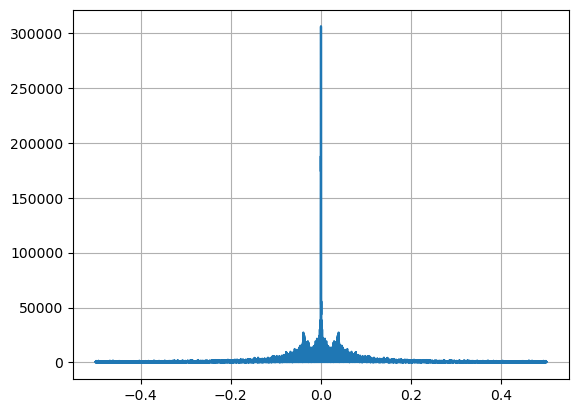

In [124]:
####tipo threshold
señal_filtrada=np.fft.fft(datos*threshold(frecuencias,0.2))
norma_señal_filtrada=abs(señal_filtrada)
indice_max=np.argmax(norma_señal_filtrada[0:len(norma_señal_filtrada)//2])
f_p=frecuencias[indice_max]
plt.plot(frecuencias,norma_señal_filtrada)
plt.grid()
print(f_p)

### PUNTO 1.2B

In [125]:
t=data.index.to_numpy()
inversa_original=np.fft.ifft(Transformada)
inversa_original+=media_datos
inversa_original=abs(inversa_original)
inversa_original

array([1.00000000e+01, 2.88713057e-14, 1.00000000e+00, ...,
       5.80000000e+01, 5.50000000e+01, 3.90000000e+01])

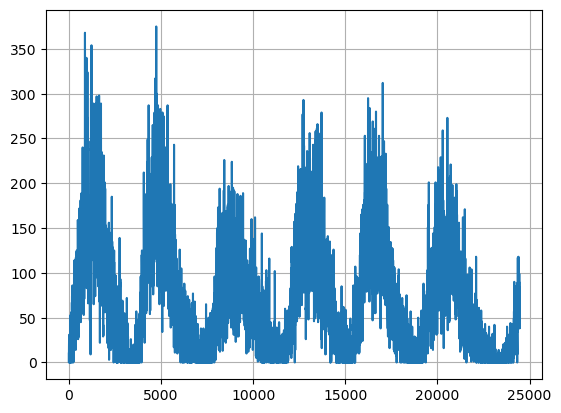

In [126]:
##Señal original
plt.plot(t,inversa_original)
plt.grid()

In [127]:
inversa_filt=np.fft.ifft(señal_filtrada)
inversa_filt+=media_datos
inversa_filt=abs(inversa_filt)
inversa_filt

array([1.00000000e+01, 1.75208364e-14, 1.00000000e+00, ...,
       5.80000000e+01, 5.50000000e+01, 3.90000000e+01])

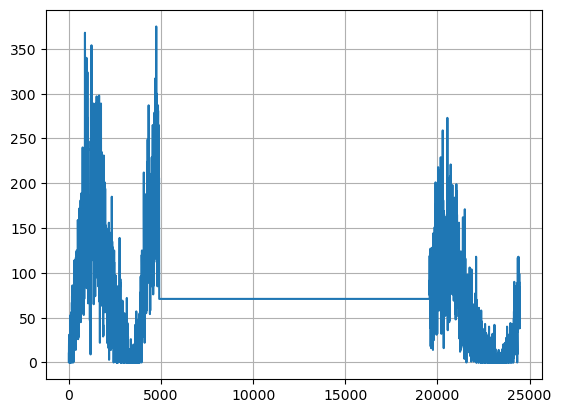

In [128]:
##Señal filtrada
plt.plot(t,inversa_filt)
plt.grid()

## 1.3 EXTRAPOLACION de funciones (más o menos) periódicas

In [281]:
import datetime as dt
n=10
f_k=np.concatenate((frecuencias[:n],frecuencias[-n:]))
F_k=np.concatenate((norma_inversa_transformada[:n],norma_inversa_transformada[-n:]))
fecha_inicio=dt.date(int(data["Year"][0]),int(data["Month"][0]),int(data["Day"][0]))
fecha_futura=dt.date(2045,1,1)
tiempo_1=pd.date_range(fecha_inicio,fecha_futura,freq="D")
n_dias=len(tiempo_1)
tiempo=np.arange(0,n_dias,1)

In [282]:
def inversa_transformada(F,f,t):
    N=len(tiempo)
    signal=np.zeros(N,dtype=complex)
    for j in range(N):
        signal[j]=(1/N)*np.sum(F*np.exp(2*np.pi*1j*f*t[j]))
    return signal
inversa=inversa_transformada(F_k,f_k,tiempo)
norma_inversa=np.abs(inversa)
F_ext=np.fft.fft(inversa)
f_ext=np.fft.fftfreq(len(F_ext))

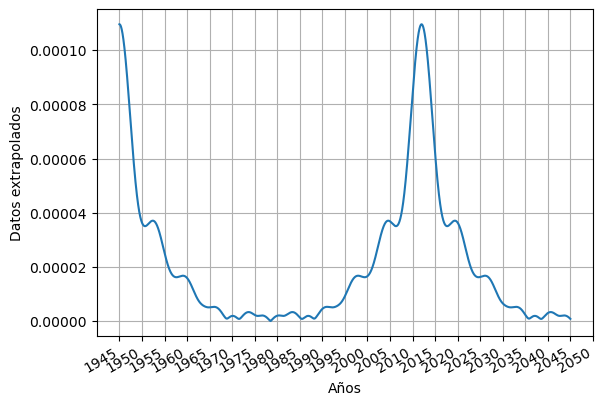

In [299]:
import matplotlib.dates as mdates
plt.plot(tiempo_1,norma_inversa)
plt.ylabel("Datos extrapolados")
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gcf().autofmt_xdate()
plt.xlabel("Años")
plt.grid()

In [286]:
## Parte del ciclo
periodo=int(periodo)
hoy=dt.date.today().strftime('%Y-%m-%d')
indice_fecha=np.where(tiempo_1==hoy)[0]
dia_años=tiempo[indice_fecha]/365
fase=np.mod(tiempo[indice_fecha]*f_principal,1)[0]
n_ciclos=(dia_años//periodo)[0]
n_ciclos,fase*periodo

(7.0, 1.4572572736188318)

In [285]:
periodo

11.169838878999498

Estamos en la posicion 13 del ciclo solar

In [270]:
## #Manchas solares A mitad de agosto
fecha="2024-08-15"
ind_año=np.where(tiempo_1==fecha)[0]
manchas_solares=norma_inversa[ind_año][0]
manchas_solares

1.6304330972850175e-05

Se espera $1.630\times 10^{-5}$ manchas solares a mitad de agosto

# PUNTO 2

In [301]:
from PIL import Image
img  = np.array(Image.open("Noisy_Smithsonian_Castle.jpg")).astype(float)

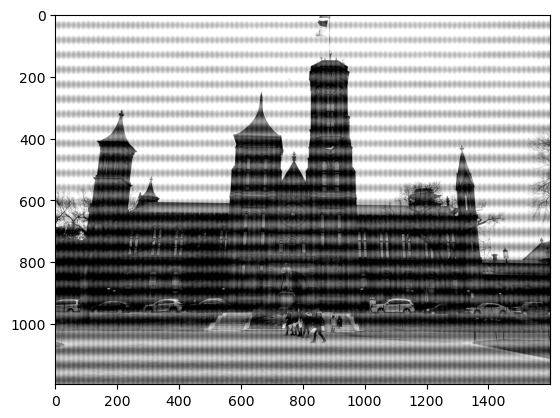

In [364]:
plt.imshow(img,cmap='gray')

### Punto 2.1

In [365]:
Transformada_2D=np.fft.fft2(img)
Transformada_2D=np.fft.fftshift(Transformada_2D)
norma_Transformada_2D=np.abs(Transformada_2D)

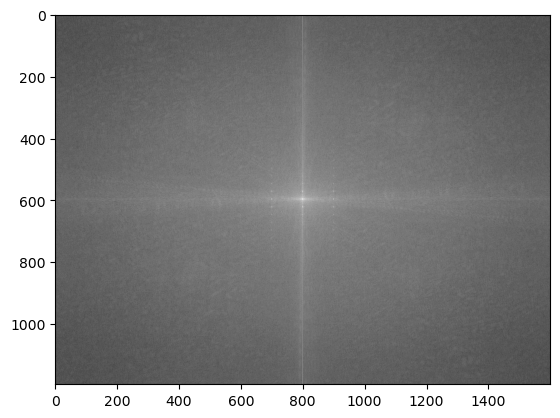

In [366]:
plt.imshow(norma_Transformada_2D,cmap='gray',norm='log')

In [367]:
norma_Transformada_2D[400:800,695:700]=0
norma_Transformada_2D[400:800,895:900]=0

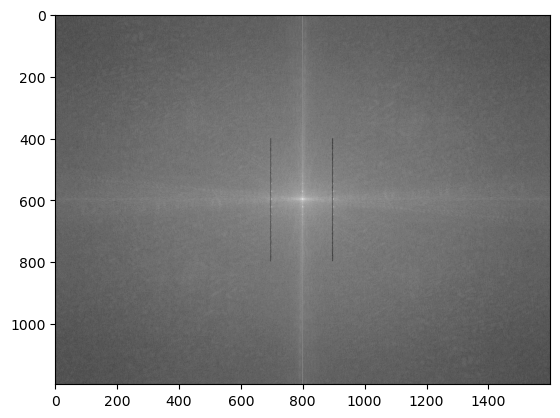

In [368]:
plt.imshow(norma_Transformada_2D,cmap='gray',norm='log')

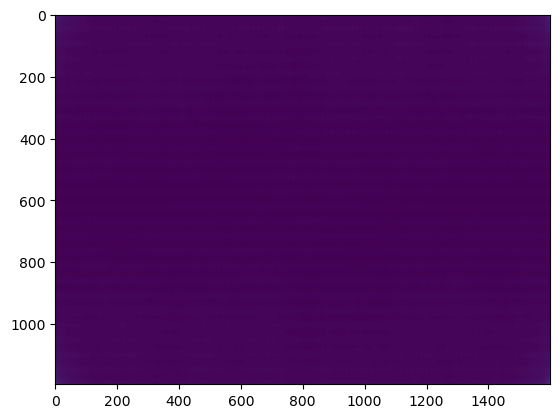

In [370]:
norma_Transformada_2D=np.fft.fftshift(norma_Transformada_2D)
inversa_T=np.fft.fft2(norma_Transformada_2D)
plt.imshow(abs(inversa_T))